In [71]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm # loop vizualization

In [72]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [73]:
train_ds = datasets.MNIST(
    root="MNIST_data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)
test_ds = datasets.MNIST(
    root="MNIST_data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

In [74]:
train_dataloader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_ds, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


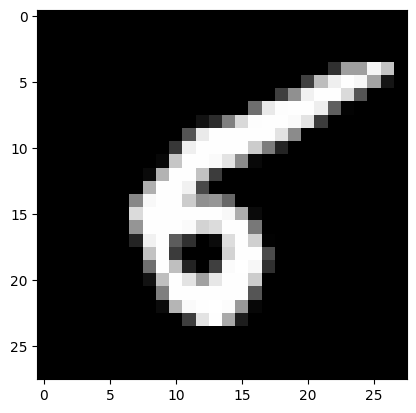

Label: 5


In [75]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [98]:
class NN(nn.Module):
    def __init__(self, input_dim, hidden_layer, output):
        super(NN, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(input_dim, hidden_layer),
            nn.ReLU(),
            nn.Linear(hidden_layer, hidden_layer),
            nn.ReLU(),
            nn.Linear(hidden_layer, output),
            nn.ReLU(),
        )

    def forward(self, x):
        x = self.seq(x)
        return nn.functional.softmax(x, dim=1)

In [99]:
model = NN(28*28, 128, 10)
model.to(device)

NN(
  (seq): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [100]:
optimizer = Adam(params=model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()

In [102]:
for data, label in train_dataloader:
        data = data.reshape(-1, 1, 28*28).to(device)
        print(model(data).shape)
        break

torch.Size([64, 1, 10])


In [83]:
num_iter = 10
losses = []
for i in tqdm(range(num_iter)):
    model.train()
    for data, label in train_dataloader:
        data = data.to(device).reshape((-1, 1, 28*28))
        label = label.to(float).to(device)
        outputs = model(data).to(float)
        loss = loss_func(outputs, label)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        optimizer.zero_grad()

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\Надя\AppData\Local\Temp\ipykernel_8812\404286710.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(x)
  0%|          | 0/10 [00:00<?, ?it/s]


RuntimeError: Expected target size [64, 10], got [64]

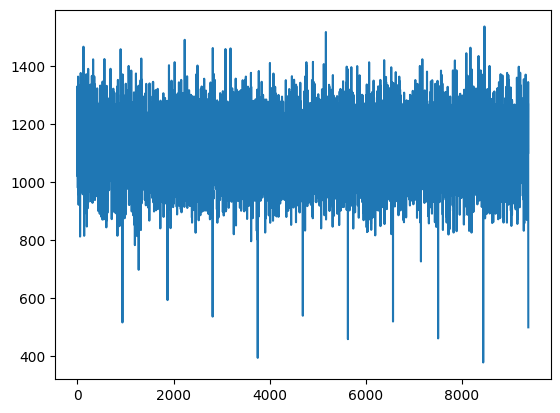

In [ ]:
plt.plot(losses)